# Problem Description:

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 


Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls. 

Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

Provide descriptive statistical summaries of the data for each model. 

# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import ttest_ind, levene, shapiro, iqr
from math import sqrt

# 2. Importing dataset

In [3]:
df = pd.read_csv('SM4-Golf.csv')

In [4]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


# Attribute Information
Current: Current golf ball that is used.
New: New ball with better cut resistance. 
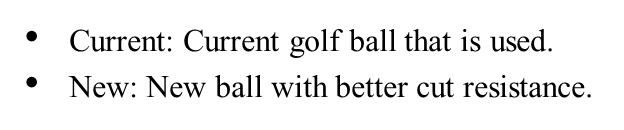

## 2a. sample size##

In [5]:
n1 =df.Current.count()
n1

40

In [6]:
n2 = df.New.count()
n2

40

# 3. Hypothesis Formulation:

Null hypothesis H0 --> Mu(Current) = Mu(New)

Alternate Hypothesis Ha --> Mu(Current) != Mu(New)

***From this we could establish that this is 2 Sample, 2-tail test***

# 4. Descriptive Statistics

In [7]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


***From above we can see sample mean, median, mode and standard deviation of both Current and New variables in the dataset***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


## 4a. handling missing data

***from the above info method we could see both attributes in our sample dataset are Numeric 
   and from Describe method on our dataset, we could see there is no zero values.
   Hence we will check for null values in our dataset if any***

In [9]:
print(df.isnull().sum())

Current    0
New        0
dtype: int64


***So, we can conclude our dataset doesn't have any missing values***

# 5. Statistical Analysis

As our problem description doesn't have population mean/stddev, so we will perform here t-test

## 5a. t-test

### 1. Check for Normality & Variance criteria

#### (a) Normality
To test for normality, I will apply the Shapiro-Wilk test by calling the scipy stats.shapiro() method
This tests the null hypothesis that the data was drawn from a normal distribution and returns the test statistic ('W') and the probability ('p').
The normality criterion holds true when p > a (where a is the probability threshold usually set to 0.05)
As it is 2 tail test, a will 0.025 on both side

In [10]:
shapiro(df.Current)

(0.9707046747207642, 0.378787100315094)

In [11]:
shapiro(df.New)

(0.9678263664245605, 0.3064655363559723)

***Since p > 0.05 for both data sets, they both conform to the normality criterion***

#### (b) Variance
To test for variance, I will apply the Levene test by calling the scipy stats.levene() method
This tests the null hypothesis that all samples come from populations with equal variances. It returns the test statistic ('W') and the probabilty ('p').
The variance criterion holds true when p > a (where a is the probability threshold usually set to 0.025 (due to 2-tail test))

In [12]:
levene(df.Current, df.New)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

***As p > 0.025 the data sets conform to the variance criterion***

### So, we can conclude by levene and Shapiro test that, our dataset conforms to Normality & Variance criterian

## ttest_ind:
Independent of the sample sizes when the norm/var criteria hold true then we can proceed and apply the t-test control by calling the scipy stats.ttest_ind() method on our data, as shown below.
As expected, the method returns the value of the statistic (t) and the probability value (p)

In [13]:
t, p = ttest_ind(df.Current, df.New)
t, p

(1.3283615935245678, 0.18793228491854663)

### Since p value > 0.025, we can conclude that we do not have enough statistical evidence to reject the Null hypothesis at 95% confidence level

***So, our recommendation for Par Inc. would be to use the current golf ball***

# Pooled Standard Deviation

As here sample size of both the variables are same,
pooled standard deviation will be, 

    sqrt((SD1**2 + SD2**2)/2)

In [14]:
from statistics import stdev

In [15]:
SD1 =  stdev(df.Current)
SD2 =  stdev(df.New)

In [16]:
pooled_stddev = sqrt((SD1**2 + SD2**2)/2)

In [17]:
pooled_stddev

9.342469200871404

# Power Analysis

Statistical power, or the power of a hypothesis test is the probability that the test correctly rejects the null hypothesis.

Power analysis is built from the following building blocks: ( I have provided the assumption made for below attributes for the analysis of power )

significance level/alpha( 0.05)

effect size(0.08)

power- we will calculate using ttest_power method

sample size- number of observations in each sample, which is 40 for both


In [18]:
from statsmodels.stats.power import ttest_power, tt_ind_solve_power,TTestIndPower

In [19]:
alpha=  0.05
effect_size=0.08
nobs=40

In [20]:
import statsmodels.stats.power as smp
power=smp.ttest_power(effect_size=effect_size, nobs=nobs, alpha=alpha, alternative='larger')
print('Power of the sample is: {0:.2f}'.format(power))

Power of the sample is: 0.13


In [21]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 200.04


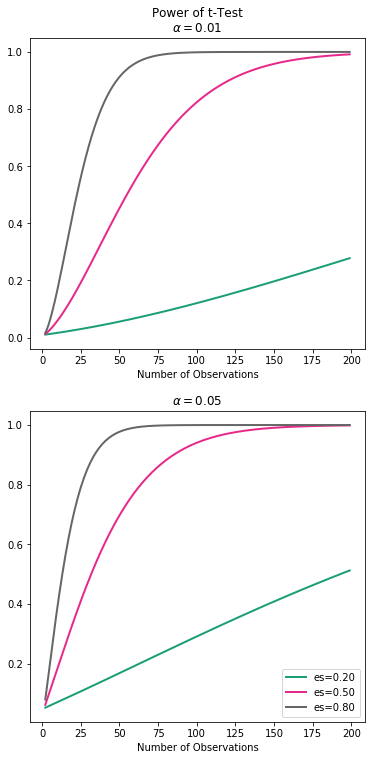

In [22]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.5)

***From the plots we can infer that an increase in the the sample/effect size leads to an increase in power***